In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.interpolate import griddata
import sys
sys.path.insert(0, '../vis/python')
import athena_read

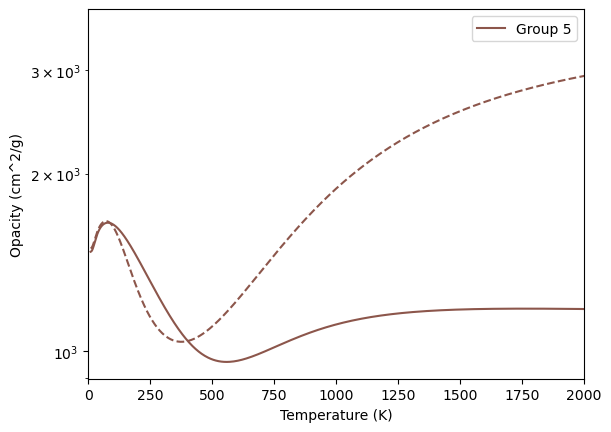

In [10]:
temp = np.genfromtxt('temp_table.txt')

kappa_pf = np.genfromtxt('kappa_pf_table.txt')
kappa_rf = np.genfromtxt('kappa_rf_table.txt')
density_unit = 4.28e-14
length_unit = 5.98e14
convert_factor = density_unit*length_unit * 1e-3  

for i in [5]:
    plt.plot(temp * 6.14e3, kappa_pf[:, i]/convert_factor, label=f'Group {i}', color=f'C{i}')
    plt.plot(temp * 6.14e3, kappa_rf[:, i]/convert_factor, linestyle='--', color=f'C{i}')
plt.xlabel('Temperature (K)')
plt.ylabel('Opacity (cm^2/g)')
plt.legend()
plt.semilogy()
plt.xlim(0, 2000)
plt.show()

In [11]:
from scipy.constants import c, h, k

# Convert constants from SI to cgs
c *= 1e2
h *= 1e7
k *= 1e7

def GetBnu_table(Ts, nus):
    """Computes Planck's law for a table of temperatures and frequencies
    """
    table = np.zeros((len(Ts), len(nus)))

    for i, T in enumerate(Ts):
        for j, nu in enumerate(nus):
            prefactor = 2*(k*T)**3/(h*c)**2
            u = h*nu/k/T
            if u < 0.001:  # Rayleigh--Jeans Law
                table[i][j] = prefactor*u**2
            elif u > 15:   # Wien Law
                table[i][j] = prefactor*u**3*np.exp(-u)
            else:          # Planck Law
                table[i][j] = prefactor*u**3/(np.exp(u) - 1)

    return table

array([2.99792458e+01, 2.60744191e+01, 2.26782000e+01, 1.97243419e+01,
       1.71552267e+01, 1.49207413e+01, 1.29772998e+01, 1.12869936e+01,
       9.81685142e+00, 8.53819673e+00, 7.42608809e+00, 6.45883271e+00,
       5.61756331e+00, 4.88587009e+00, 4.24948063e+00, 3.69598154e+00,
       3.21457626e+00, 2.79587450e+00, 2.43170906e+00, 2.11497653e+00,
       1.83949872e+00, 1.59990218e+00, 1.39151333e+00, 1.21026733e+00,
       1.05262880e+00, 9.15522849e-01, 7.96275085e-01, 6.92559461e-01,
       6.02352901e-01, 5.23895834e-01, 4.55657879e-01, 3.96307986e-01,
       3.44688476e-01, 2.99792458e-01, 2.60744191e-01, 2.26782000e-01,
       1.97243419e-01, 1.71552267e-01, 1.49207413e-01, 1.29772998e-01,
       1.12869936e-01, 9.81685142e-02, 8.53819673e-02, 7.42608809e-02,
       6.45883271e-02, 5.61756331e-02, 4.88587009e-02, 4.24948063e-02,
       3.69598154e-02, 3.21457626e-02, 2.79587450e-02, 2.43170906e-02,
       2.11497653e-02, 1.83949872e-02, 1.59990218e-02, 1.39151333e-02,
      

[]

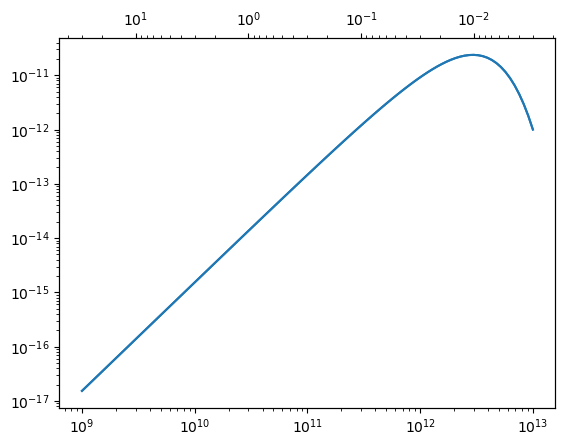

In [62]:
Ts = [50]
nus = np.logspace(9, 13, 100)  # Frequency in Hz
plt.plot(nus, GetBnu_table(Ts, nus)[0])
plt.loglog()
plt.twiny()
plt.plot(c/nus, GetBnu_table(Ts, nus)[0])
plt.gca().invert_xaxis()

plt.loglog()

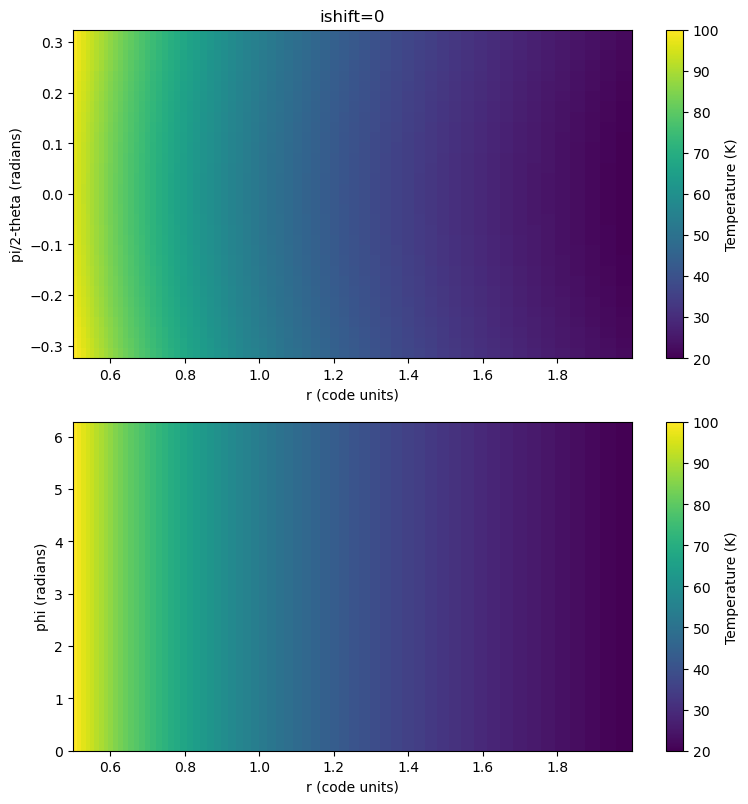

In [81]:
foldername = './'
ishift_min, ishift_max = 0, 42  # Set your range here

fig, axs = plt.subplots(2, 1, figsize=(8, 8))
pcm1 = axs[0].pcolormesh(np.zeros((2,2)), np.zeros((2,2)), np.zeros((2,2)), vmin=20, vmax=100)
pcm2 = axs[1].pcolormesh(np.zeros((2,2)), np.zeros((2,2)), np.zeros((2,2)), vmin=20, vmax=100)
cb1 = fig.colorbar(pcm1, ax=axs[0], label='Temperature (K)')
cb2 = fig.colorbar(pcm2, ax=axs[1], label='Temperature (K)')
axs[0].set_xlabel('r (code units)')
axs[0].set_ylabel('pi/2-theta (radians)')
axs[1].set_xlabel('r (code units)')
axs[1].set_ylabel('phi (radians)')

def update(ishift):
    filename = f'dsharp.out1.{ishift:05}.athdf'
    data = athena_read.athdf(foldername + filename)
    data['temp'] = data['press']/data['rho']*6.14e3

    axs[0].cla()
    axs[1].cla()
    pcm1 = axs[0].pcolormesh(data['x1v'], np.pi/2.-data['x2v'], data['temp'][0])
    axs[0].set_xlabel('r (code units)')
    axs[0].set_ylabel('pi/2-theta (radians)')
    axs[0].set_title(f'ishift={ishift}')
    #fig.colorbar(pcm1, ax=axs[0], label='Temperature (K)')

    pcm2 = axs[1].pcolormesh(data['x1v'], data['x3v'], data['temp'][:,15,:])
    axs[1].set_xlabel('r (code units)')
    axs[1].set_ylabel('phi (radians)')
    #fig.colorbar(pcm2, ax=axs[1], label='Temperature (K)')

ani = FuncAnimation(fig, update, frames=range(ishift_min, ishift_max+1), repeat=False)
plt.tight_layout()
ani.save('movie.mp4', writer='ffmpeg')

Text(0, 0.5, 'phi (radians)')

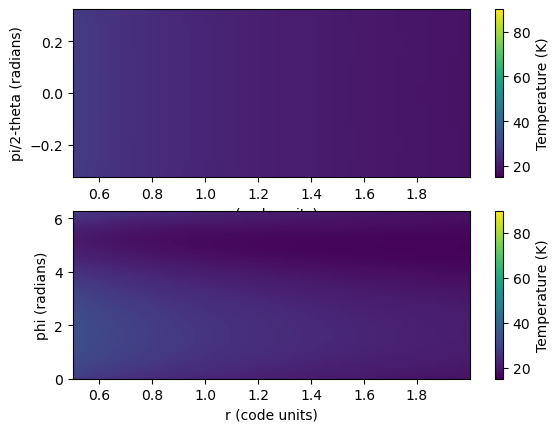

In [38]:

ishift = 10
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3
plt.subplot(2, 1, 1)
plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], data['temp'][0], vmin=15, vmax=90)
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('pi/2-theta (radians)')

plt.subplot(2, 1, 2)
plt.pcolormesh(data['x1v'], data['x3v'], data['temp'][:,15,:], vmin=15, vmax=90)
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('phi (radians)')

In [ ]:
data['VariableNames']

array([b'rho', b'press', b'vel1', b'vel2', b'vel3', b'Er_0', b'Fr_0_1',
       b'Fr_0_2', b'Fr_0_3', b'Pr_0_11', b'Pr_0_22', b'Pr_0_33',
       b'Pr_0_12', b'Pr_0_13', b'Pr_0_23', b'Pr_0_21', b'Pr_0_31',
       b'Pr_0_32', b'Er0_0', b'Fr0_0_1', b'Fr0_0_2', b'Fr0_0_3', b'Er_1',
       b'Fr_1_1', b'Fr_1_2', b'Fr_1_3', b'Pr_1_11', b'Pr_1_22',
       b'Pr_1_33', b'Pr_1_12', b'Pr_1_13', b'Pr_1_23', b'Pr_1_21',
       b'Pr_1_31', b'Pr_1_32', b'Er0_1', b'Fr0_1_1', b'Fr0_1_2',
       b'Fr0_1_3', b'Er_2', b'Fr_2_1', b'Fr_2_2', b'Fr_2_3', b'Pr_2_11',
       b'Pr_2_22', b'Pr_2_33', b'Pr_2_12', b'Pr_2_13', b'Pr_2_23',
       b'Pr_2_21', b'Pr_2_31', b'Pr_2_32', b'Er0_2', b'Fr0_2_1',
       b'Fr0_2_2', b'Fr0_2_3', b'Er_3', b'Fr_3_1', b'Fr_3_2', b'Fr_3_3',
       b'Pr_3_11', b'Pr_3_22', b'Pr_3_33', b'Pr_3_12', b'Pr_3_13',
       b'Pr_3_23', b'Pr_3_21', b'Pr_3_31', b'Pr_3_32', b'Er0_3',
       b'Fr0_3_1', b'Fr0_3_2', b'Fr0_3_3', b'Er_4', b'Fr_4_1', b'Fr_4_2',
       b'Fr_4_3', b'Pr_4_11', b'Pr_4_22', 

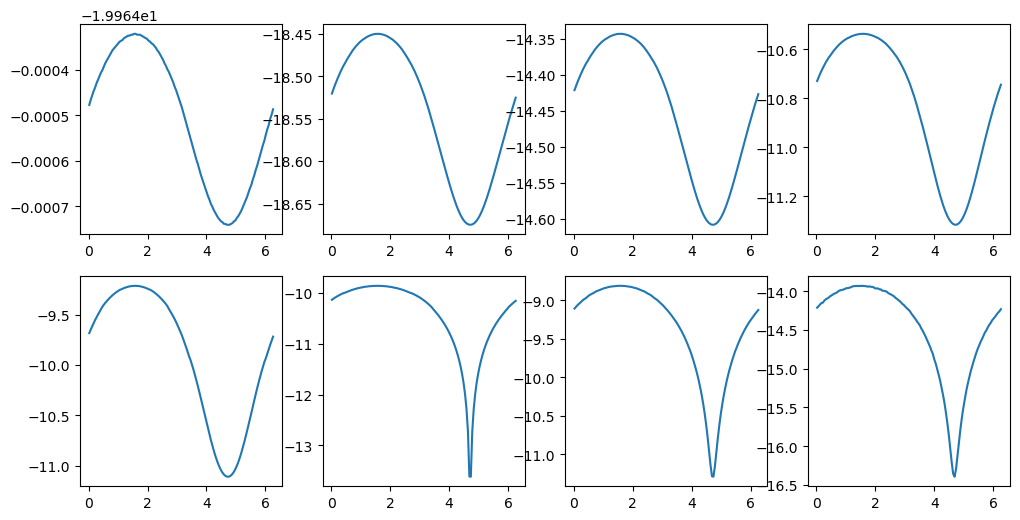

In [36]:
plt.figure(figsize=(12, 6))
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.plot(data['x3v'], np.log10(data[f'Er_{i}'][:,15, 32]),)

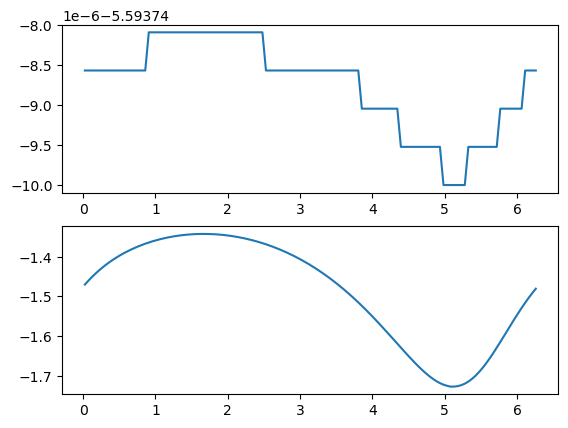

In [39]:
for i in range(2):
  plt.subplot(2, 1, i+1)
  plt.plot(data['x3v'], np.log10(data[f'Sigma_a_{i}'][:,15, 32]),)

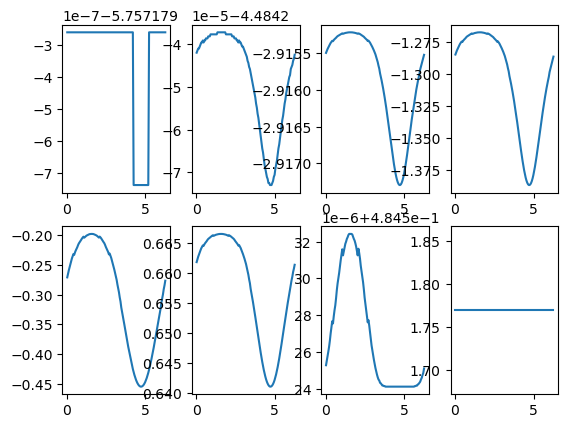

In [ ]:
for i in range(8):
  plt.subplot(2, 4, i+1)
  plt.plot(data['x3v'], np.log10(data[f'Sigma_a_{i}'][:,15, 32]),)

Text(0, 0.5, 'phi (radians)')

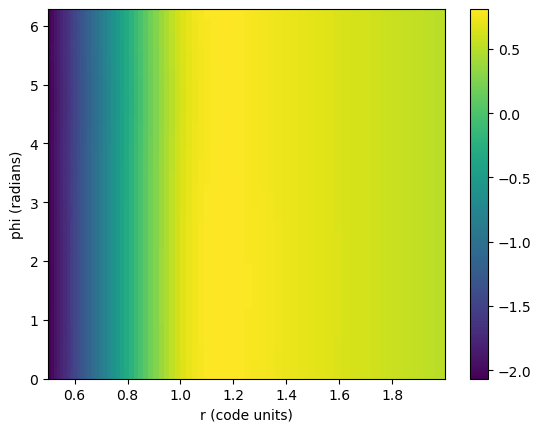

In [ ]:
plt.pcolormesh(data['x1v'], data['x3v'], np.log10(data['Sigma_a_5'][:,15,:]),)
plt.colorbar()
plt.xlabel('r (code units)')
plt.ylabel('phi (radians)')

Text(0, 0.5, 'phi (radians)')

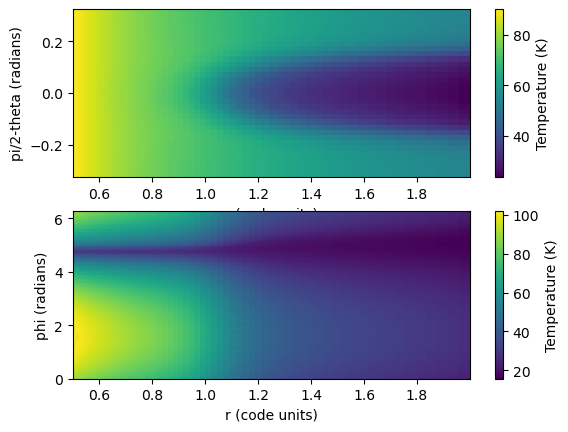

In [89]:
ishift = 100
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3
plt.subplot(2, 1, 1)
plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], data['temp'][0])
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('pi/2-theta (radians)')

plt.subplot(2, 1, 2)
plt.pcolormesh(data['x1v'], data['x3v'], data['temp'][:,15,:])
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('phi (radians)')

[]

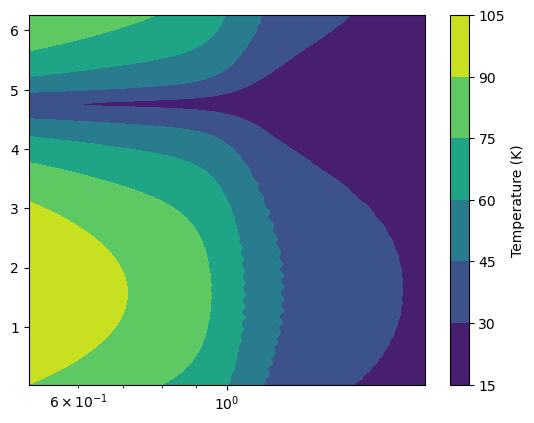

In [90]:
plt.contourf(data['x1v'], data['x3v'], data['temp'][:,15,:])
plt.colorbar(label='Temperature (K)')
plt.semilogx()

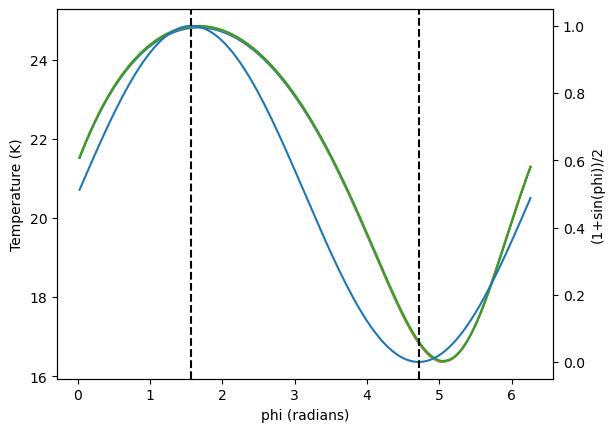

In [ ]:

#plt.plot(data['x3v'], data['temp'][:, 15, 11])
#plt.plot(data['x3v'], data['temp'][:, 15, 31])
#plt.plot(data['x3v'], data['temp'][:, 15, 60])
plt.plot(data['x3v'], data['temp'][:, 15, 40])
plt.plot(data['x3v'], data['temp'][:, 10, 40])
plt.plot(data['x3v'], data['temp'][:, 5, 40])

plt.ylabel('Temperature (K)')
plt.xlabel('phi (radians)')
plt.twinx()
plt.plot(data['x3v'], 0.5*(1.+np.sin(data['x3v'])) )
plt.ylabel('(1+sin(phi))/2')
plt.axvline(x=np.pi/2., color='k', linestyle='--')
plt.axvline(x=3.*np.pi/2., color='k', linestyle='--')

Text(0, 0.5, 'phi (radians)')

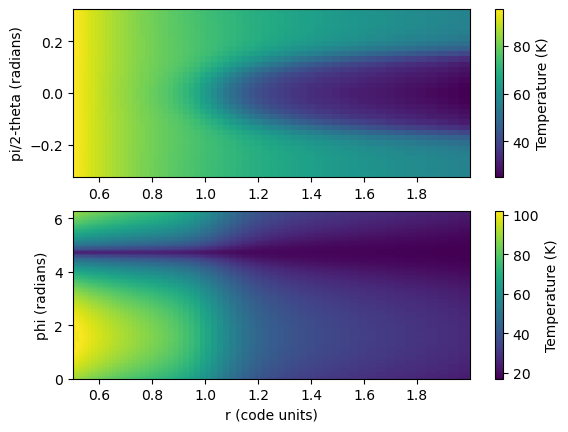

In [ ]:
:ishift = 6
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3
plt.subplot(2, 1, 1)
plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], data['temp'][7])
plt.colorbar(label='Temperature (K)')
plt.ylabel('pi/2-theta (radians)')

plt.subplot(2, 1, 2)
plt.pcolormesh(data['x1v'], data['x3v'], data['temp'][:,15,:])
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('phi (radians)')

Text(0, 0.5, 'phi (radians)')

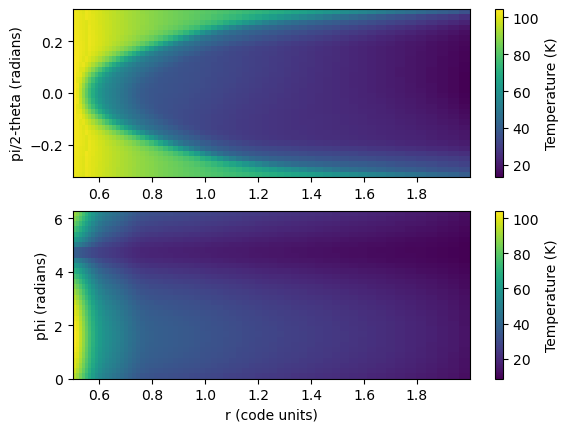

In [27]:
ishift = 6
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3
plt.subplot(2, 1, 1)
plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], data['temp'][7])
plt.colorbar(label='Temperature (K)')
plt.ylabel('pi/2-theta (radians)')

plt.subplot(2, 1, 2)
plt.pcolormesh(data['x1v'], data['x3v'], data['temp'][:,15,:])
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('phi (radians)')

Text(0, 0.5, 'phi (radians)')

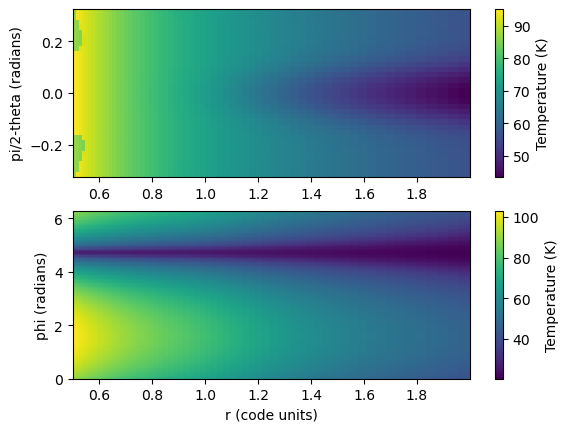

In [34]:
ishift = 6
foldername = './'
filename = f'./dsharp.out1.{0+ishift:05}.athdf'
data = athena_read.athdf(foldername+filename )
data['temp'] = data['press']/data['rho']*6.14e3
plt.subplot(2, 1, 1)
plt.pcolormesh(data['x1v'], np.pi/2.-data['x2v'], data['temp'][7])
plt.colorbar(label='Temperature (K)')
plt.ylabel('pi/2-theta (radians)')

plt.subplot(2, 1, 2)
plt.pcolormesh(data['x1v'], data['x3v'], data['temp'][:,15,:])
plt.colorbar(label='Temperature (K)')
plt.xlabel('r (code units)')
plt.ylabel('phi (radians)')

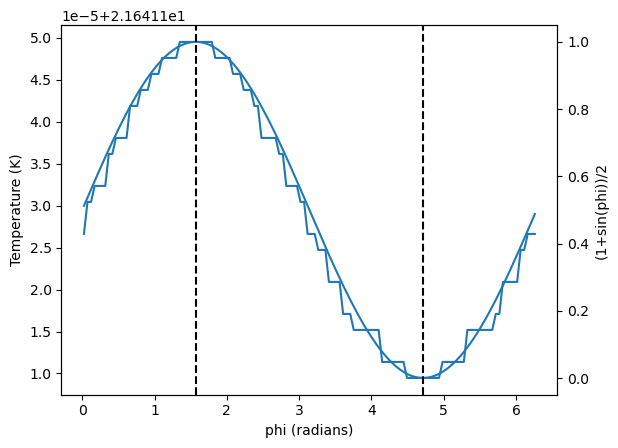

In [12]:

#plt.plot(data['x3v'], data['temp'][:, 15, 11])
#plt.plot(data['x3v'], data['temp'][:, 15, 31])
#plt.plot(data['x3v'], data['temp'][:, 15, 60])
plt.plot(data['x3v'], data['temp'][:, 15, 60])

plt.ylabel('Temperature (K)')
plt.xlabel('phi (radians)')
plt.twinx()
plt.plot(data['x3v'], 0.5*(1.+np.sin(data['x3v'])) )
plt.ylabel('(1+sin(phi))/2')
plt.axvline(x=np.pi/2., color='k', linestyle='--')
plt.axvline(x=3.*np.pi/2., color='k', linestyle='--')

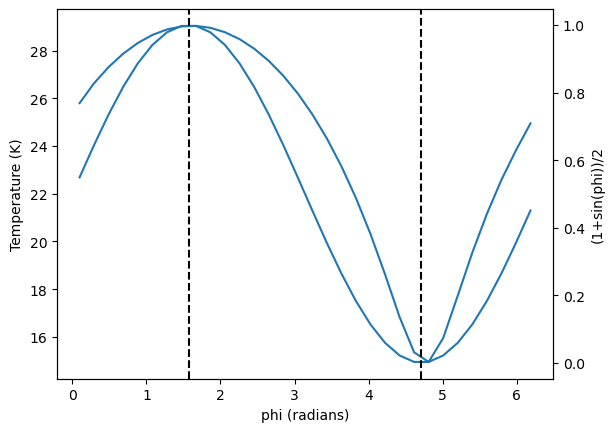

In [23]:

plt.plot(data['x3v'], data['temp'][:, 15, 60])
plt.ylabel('Temperature (K)')
plt.xlabel('phi (radians)')
plt.twinx()
plt.plot(data['x3v'], 0.5*(1.+np.sin(data['x3v'])) )
plt.ylabel('(1+sin(phi))/2')
plt.axvline(x=np.pi/2., color='k', linestyle='--')
plt.axvline(x=3.*np.pi/2., color='k', linestyle='--')

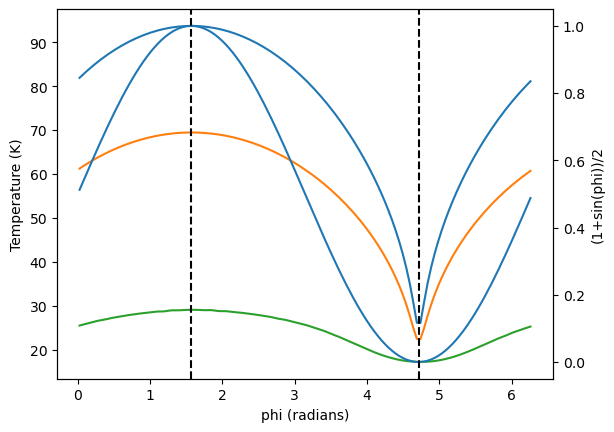

In [38]:

plt.plot(data['x3v'], data['temp'][:, 15, 11])
plt.plot(data['x3v'], data['temp'][:, 15, 31])
plt.plot(data['x3v'], data['temp'][:, 15, 60])

plt.ylabel('Temperature (K)')
plt.xlabel('phi (radians)')
plt.twinx()
plt.plot(data['x3v'], 0.5*(1.+np.sin(data['x3v'])) )
plt.ylabel('(1+sin(phi))/2')
plt.axvline(x=np.pi/2., color='k', linestyle='--')
plt.axvline(x=3.*np.pi/2., color='k', linestyle='--')